# Evaluating CLM Simulations at NEON Tower Sites -- Tutorial 

This tutorial is an introduction to evaluating CLM at NEON tower sites.  It provides example visualizations and evaluation of simulated latent heat flux using NEON tower observations.  


__In this tutorial :__

The tutorial has several components. Below you will find steps to: 
1. Explore CLM model data
1. Explore NEON observation data
1. Compare CLM and NEON latent heat flux data

________
<h2> 1. Explore CLM model data </h2>

There are countless ways of analyzing and processing model data. This tutorial uses Matplotlib, a comprehensive data visualization and plotting library for Python. For more information on Matplotlib, please see the [User's Guide](https://matplotlib.org/stable/users/index.html).

Before diving in, set the NEON site that you simulated in the cell below. **This needs to be the same site as you used in the previous tutorial.** Otherwise the data will not be available. NEON tower sites include:

>ABBY, BART, BLAN, CPER, DCFS, DSNY, GRSM, HARV, JERC, JORN, KONZ, MOAB, NOGP, OAES, ORNL, OSBS, SCBI, SERC, SOAP, SRER, STEI, TALL, TREE, UKFS, UNDE, WOOD.  

*The tutorial is currently set to use the ABBY site. If you ran a simulation for a different tower, please change the 4-character site name in quotes below to the same as your simulation.*

In [32]:
#Change the 4-character NEON site below to point to your NEON site:
neon_site = ['YELL','HARV','SRER']

import os
os.environ['site'] = neon_site[0]

pathIn = '/glade/scratch/jedwards/NEON/archive/'

***
<h3> 1.1 Locate model data </h3>

When the simulation completes, the data are transferred to an `archive` directory. In this directory, there are files that include data for every day of the simulation, as well as files that average model variables monthly. <p>

*Run the cell below to see a subset of the files listed:*

In [33]:
!ls /glade/scratch/jedwards/NEON/archive/$site.transient/lnd/hist/*2018*.nc |head -10

/glade/scratch/jedwards/NEON/archive/YELL.transient/lnd/hist/YELL.transient.clm2.h0.2018-08.nc
/glade/scratch/jedwards/NEON/archive/YELL.transient/lnd/hist/YELL.transient.clm2.h0.2018-09.nc
/glade/scratch/jedwards/NEON/archive/YELL.transient/lnd/hist/YELL.transient.clm2.h0.2018-10.nc
/glade/scratch/jedwards/NEON/archive/YELL.transient/lnd/hist/YELL.transient.clm2.h0.2018-11.nc
/glade/scratch/jedwards/NEON/archive/YELL.transient/lnd/hist/YELL.transient.clm2.h0.2018-12.nc
/glade/scratch/jedwards/NEON/archive/YELL.transient/lnd/hist/YELL.transient.clm2.h1.2018-08-01-00000.nc
/glade/scratch/jedwards/NEON/archive/YELL.transient/lnd/hist/YELL.transient.clm2.h1.2018-08-02-00000.nc
/glade/scratch/jedwards/NEON/archive/YELL.transient/lnd/hist/YELL.transient.clm2.h1.2018-08-03-00000.nc
/glade/scratch/jedwards/NEON/archive/YELL.transient/lnd/hist/YELL.transient.clm2.h1.2018-08-04-00000.nc
/glade/scratch/jedwards/NEON/archive/YELL.transient/lnd/hist/YELL.transient.clm2.h1.2018-08-05-00000.nc
ls: w

<h3>1.2 Explore Simulated Data </h3>

This step has several components, which are broken into smaller steps


<h4>1.2.1 Load Python Libraries</h4>

*Run the below code to import the required python libraries*

In [34]:
#Import Libraries
%matplotlib inline

import os
import sys
import time

import numpy as np
import pandas as pd
import xarray as xr

from glob import glob
from os.path import join, expanduser

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from scipy import stats

from neon_utils import download_eval_files

<h4>1.2.2 Load model data files</h4>

In [35]:
sim_path = [pathIn +neon_site[s]+".transient/lnd/hist/" for s in range(len(neon_site))]
print(sim_path)
sim_files = [sim_path[s]+neon_site[s]+".transient.clm2.h1.*.nc" for s in range(len(neon_site))]

['/glade/scratch/jedwards/NEON/archive/YELL.transient/lnd/hist/', '/glade/scratch/jedwards/NEON/archive/HARV.transient/lnd/hist/', '/glade/scratch/jedwards/NEON/archive/SRER.transient/lnd/hist/']


<h4> 1.2.3 Open model data files </h4>

In [36]:
def preprocess (ds):
    variables = [
        'ELAI'
    ]
    ds_new= ds[variables]
    return ds_new

start = time.time()

ds0 = xr.open_mfdataset(sim_files[0], preprocess=preprocess, decode_times=True, combine='by_coords',parallel=True)
ds1 = xr.open_mfdataset(sim_files[1], preprocess=preprocess, decode_times=True, combine='by_coords',parallel=True)
ds2 = xr.open_mfdataset(sim_files[2], preprocess=preprocess, decode_times=True, combine='by_coords',parallel=True)
# Combine datesets
ds = xr.combine_nested([ds0,ds1,ds2], concat_dim=["site"])
ds = ds.assign_coords({"site": neon_site}).persist()

end = time.time()
print("Reading all simulation files took:", end-start, "s.")


NameError: name 'wait' is not defined

<h4> 1.2.4 Optional Step: Explore dataset from simulations </h4>

In [38]:
# get rid of extra dimensions & coordinates 
ds  = ds.isel(lndgrid=0)
ds

,Array,Chunk
Bytes,979.40 kB,320 B
Shape,"(3, 81617)","(1, 80)"
Count,7488 Tasks,3744 Chunks
Type,float32,numpy.ndarray


/glade/u/home/wwieder/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


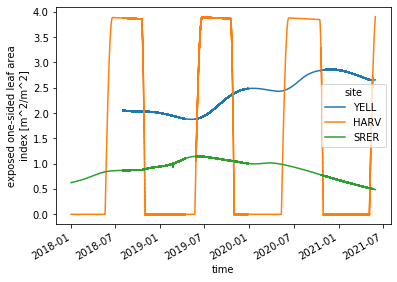

In [40]:
ds.ELAI.plot(hue='site') ;

/glade/u/home/wwieder/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


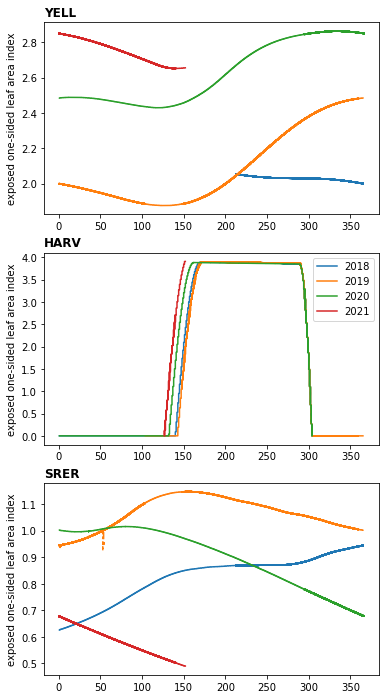

In [89]:
years = range(2018,2022,1)
nyear = len(years)
plt.figure(figsize=[6,12])

for s in range(len(neon_site)):
    plt.subplot(3,1,(s+1))
    for i in range(nyear):
        y = ds.ELAI.isel(site=s).where(ds['time.year'] == years[i])
        plt.plot(y['time.dayofyear'], y)
    
    months = mdates.MonthLocator()  # every month   
    fmt = mdates.DateFormatter('%b')
    #plt.xaxis.set_major_locator(months)
    #plt.xaxis.set_major_formatter(fmt)
    plt.title(neon_site[s], loc='left', fontsize='large', fontweight='bold');
    plt.ylabel(ds.ELAI.attrs['long_name'])
    if s == 1:
        plt.legend(years)
plt.show() ;

________
<h2> 2. Explore NEON Tower Observation Data </h2>

<h3> 2.1 Download NEON data </h3>

This step uses a preestablished function (`download_eval_files`) that downloads the NEON observational data files for the site and year specified above. 


In [94]:
pheno_dir = "/glade/u/home/wwieder/python/NEON-visualization/PhenoCam/"
pheno_fin = [pheno_dir+'NEON*'+neon_site[s]+'.DP1.00033_*_1000_1day.csv' for s in range(len(neon_site))]
pheno_fin[0]

'/glade/u/home/wwieder/python/NEON-visualization/PhenoCam/NEON*YELL.DP1.00033_*_1000_1day.csv'

<h3> 2.2 Load Phenocam data </h3>

In [126]:
import pandas as pd

df0=pd.read_csv('/glade/u/home/wwieder/python/NEON-visualization/PhenoCam/NEON.D12.YELL.DP1.00033_EN_1000_1day.csv', sep=',',header=22)
df1=pd.read_csv('/glade/u/home/wwieder/python/NEON-visualization/PhenoCam/NEON.D01.HARV.DP1.00033_DB_1000_1day.csv', sep=',',header=22)
df2=pd.read_csv('/glade/u/home/wwieder/python/NEON-visualization/PhenoCam/NEON.D14.SRER.DP1.00033_SH_1000_1day.csv', sep=',',header=22)

In [127]:
# convert date to time
df0.date = pd.to_datetime(df0.date)
df1.date = pd.to_datetime(df1.date)
df2.date = pd.to_datetime(df2.date)

#convert to xarray datasets w/ coordinate time
df0 = df0.to_xarray()
df0 = df0.rename({'index': 'time'})
df0 = df0.assign_coords({"time": ("time", df0.date)})

df1 = df1.to_xarray()
df1 = df1.rename({'index': 'time'})
df1 = df1.assign_coords({"time": ("time", df1.date)})

df2 = df2.to_xarray()
df2 = df2.rename({'index': 'time'})
df2 = df2.assign_coords({"time": ("time", df2.date)})


In [128]:
# Create xarray data array
pc = xr.combine_nested([df0,df1,df2], concat_dim=["site"])
pc = pc.assign_coords({"site": neon_site})

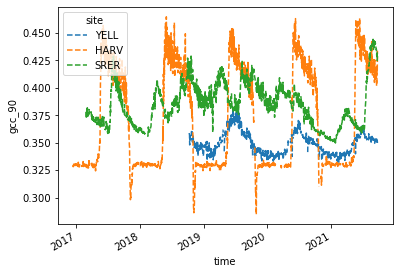

In [149]:
pc.gcc_90.plot(hue='site',linestyle='dashed') ;

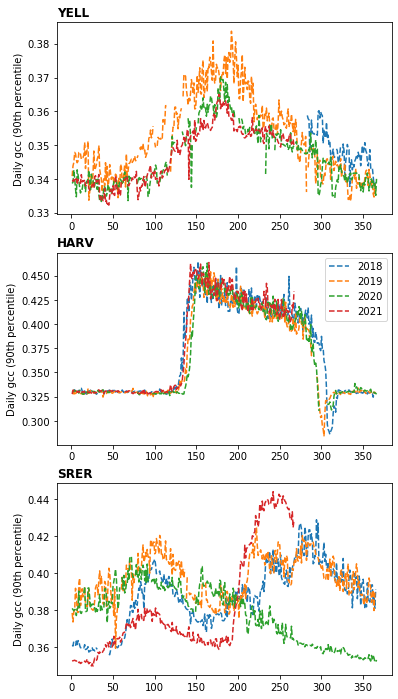

In [153]:
years = range(2018,2022,1)
nyear = len(years)
plt.figure(figsize=[6,12])

for s in range(len(neon_site)):
    plt.subplot(3,1,(s+1))
    for i in range(nyear):
        y = pc.gcc_90.isel(site=s).where(pc['time.year'] == years[i])
        plt.plot(y['time.dayofyear'], y,linestyle='dashed')
    
    months = mdates.MonthLocator()  # every month   
    fmt = mdates.DateFormatter('%b')
    #plt.xaxis.set_major_locator(months)
    #plt.xaxis.set_major_formatter(fmt)
    plt.title(neon_site[s], loc='left', fontsize='large', fontweight='bold');
    plt.ylabel('Daily gcc (90th percentile)')
    if s == 1:
        plt.legend(years)
plt.show() ;

<Figure size 432x864 with 0 Axes>

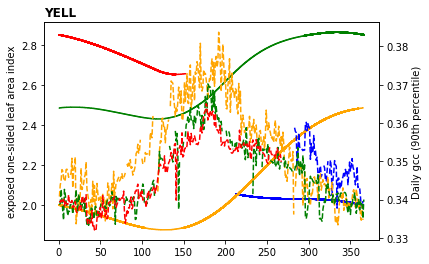

/glade/u/home/wwieder/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


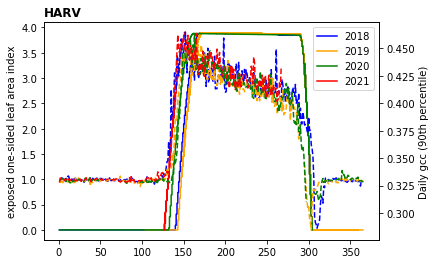

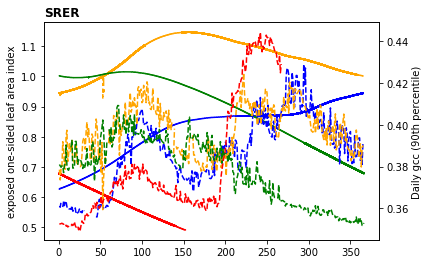

In [155]:
years = range(2018,2022,1)
nyear = len(years)
plt.figure(figsize=[6,12])
color=['blue','orange','green','red']
for s in range(len(neon_site)):
    fig, ax1 = plt.subplots()
    for i in range(nyear):
        y = ds.ELAI.isel(site=s).where(ds['time.year'] == years[i])
        ax1.plot(y['time.dayofyear'], y,c=color[i])

    if s == 1:
        ax1.legend(years)

    ax2 = ax1.twinx()
    for i in range(nyear):
        y2 = pc.gcc_90.isel(site=s).where(pc['time.year'] == years[i])
        ax2.plot(y2['time.dayofyear'], y2,c=color[i],linestyle='dashed')
    
    months = mdates.MonthLocator()  # every month   
    fmt = mdates.DateFormatter('%b')
    #ax1.xaxis.set_major_locator(months)
    #ax1.xaxis.set_major_formatter(fmt)
    plt.title(neon_site[s], loc='left', fontsize='large', fontweight='bold');
    ax1.set_ylabel(ds.ELAI.attrs['long_name'])
    ax2.set_ylabel('Daily gcc (90th percentile)')
plt.show() ;